### Prepare the tools

In [19]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
import pickle

### Load the data

In [20]:
# Load the data
data = pd.read_csv("Churn_Modelling.csv")
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Let's do some Data Exploration (EDA)

In [39]:
import matplotlib.pyplot as plt

In [41]:
data.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1.0,0.0,0.0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0.0,0.0,1.0
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1.0,0.0,0.0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1.0,0.0,0.0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0.0,0.0,1.0


In [42]:
data.tail()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
9995,771,1,39,5,0.00,2,1,0,96270.64,0,1.0,0.0,0.0
9996,516,1,35,10,57369.61,1,1,1,101699.77,0,1.0,0.0,0.0
9997,709,0,36,7,0.00,1,0,1,42085.58,1,1.0,0.0,0.0
9998,772,1,42,3,75075.31,2,1,0,92888.52,1,0.0,1.0,0.0
9999,792,0,28,4,130142.79,1,1,0,38190.78,0,1.0,0.0,0.0


In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Gender             10000 non-null  int32  
 2   Age                10000 non-null  int64  
 3   Tenure             10000 non-null  int64  
 4   Balance            10000 non-null  float64
 5   NumOfProducts      10000 non-null  int64  
 6   HasCrCard          10000 non-null  int64  
 7   IsActiveMember     10000 non-null  int64  
 8   EstimatedSalary    10000 non-null  float64
 9   Exited             10000 non-null  int64  
 10  Geography_France   10000 non-null  float64
 11  Geography_Germany  10000 non-null  float64
 12  Geography_Spain    10000 non-null  float64
dtypes: float64(5), int32(1), int64(7)
memory usage: 976.7 KB


In [44]:
data.describe()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,0.545700,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700,0.501400,0.250900,0.247700
std,96.653299,0.497932,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769,0.500023,0.433553,0.431698
min,350.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,0.000000,0.000000
25%,584.000000,0.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,0.000000,0.000000
50%,652.000000,1.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,1.000000,0.000000,0.000000
75%,718.000000,1.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,1.000000,1.000000,0.000000
max,850.000000,1.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,1.000000,1.000000


In [45]:
# Check for any missing values
data.isna().sum()

CreditScore          0
Gender               0
Age                  0
Tenure               0
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
Geography_France     0
Geography_Germany    0
Geography_Spain      0
dtype: int64

In [48]:
cross_tab = pd.crosstab(data.Tenure, data.Gender)
cross_tab

Gender,0,1
Tenure,,
0,204,209
1,478,557
2,480,568
3,469,540
4,442,547
5,448,564
6,458,509
7,464,564
8,433,592


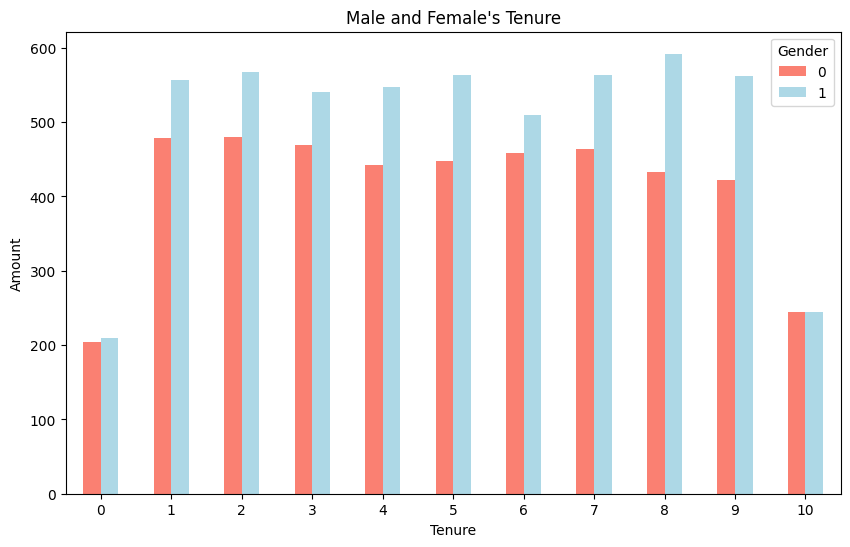

In [52]:
# Let's visualize the comparison for more better understanding
cross_tab.plot(kind="bar",
        figsize=(10,6),
        color = ["salmon","lightblue"])
plt.title("Male and Female's Tenure")
plt.xlabel("Tenure")
plt.ylabel("Amount")
plt.xticks(rotation=0);

### Preprocessing the data

In [21]:
# Drop the irrelevant columns
data = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [22]:
# Encode categorical variables
label_encoder_gender = LabelEncoder()
data['Gender'] = label_encoder_gender.fit_transform(data['Gender'])

In [23]:
# One-hot encode 'Geography'
one_hot_geo = OneHotEncoder(handle_unknown='ignore')
geo_encoded = one_hot_geo.fit_transform(data[['Geography']]).toarray()
geo_encoded_df = pd.DataFrame(geo_encoded, columns=one_hot_geo.get_feature_names_out(['Geography']))
geo_encoded_df

,Geography_France,Geography_Germany,Geography_Spain
0,1.0,0.0,0.0
1,0.0,0.0,1.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,0.0,0.0,1.0
...,...,...,...
9995,1.0,0.0,0.0
9996,1.0,0.0,0.0
9997,1.0,0.0,0.0
9998,0.0,1.0,0.0


In [24]:
# Combine one-hot encoded columns with original data
data = pd.concat([data.drop('Geography', axis=1), geo_encoded_df], axis=1)
data.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1.0,0.0,0.0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0.0,0.0,1.0
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1.0,0.0,0.0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1.0,0.0,0.0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0.0,0.0,1.0


### Split the data into independent and dependent features

In [25]:
# Split the data into features and target
X = data.drop('EstimatedSalary', axis=1)
y = data['EstimatedSalary']

In [26]:
# Split the data in training and tetsing sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [27]:
## Scale these features
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [28]:
# Save the encoders and scaler for later use
with open('label_encoder_gender.pkl', 'wb') as file:
    pickle.dump(label_encoder_gender, file)

with open('one_hot_geo.pkl', 'wb') as file:
    pickle.dump(one_hot_geo, file)

with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

## ANN Regression Implementation

### Import the tools

In [29]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

### Build the model

In [30]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for regression
])

## compile the model
model.compile(optimizer='adam',loss='mean_absolute_error',metrics=['mae'])

model.summary()

c:\Users\HP\Documents\Gen_AI\ann_classification_project\venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,945 (11.50 KB)

 Trainable params: 2,945 (11.50 KB)

 Non-trainable params: 0 (0.00 B)

In [31]:
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
import datetime

# Set up TensorBoard
log_dir = "regressionlogs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

In [32]:
# Set up Early Stopping
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

### Train the model

In [33]:
# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=100,
    callbacks=[early_stopping_callback, tensorboard_callback]
)

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 99716.2734 - mae: 99716.2734 - val_loss: 98507.9062 - val_mae: 98507.9062
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 99620.0625 - mae: 99620.0625 - val_loss: 97006.6016 - val_mae: 97006.6016
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 97841.6797 - mae: 97841.6797 - val_loss: 93211.9375 - val_mae: 93211.9375
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 92290.3125 - mae: 92290.3125 - val_loss: 86896.9766 - val_mae: 86896.9766
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 86372.6094 - mae: 86372.6094 - val_loss: 78723.9922 - val_mae: 78723.9922
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 78108.5938 - mae: 78108.5938 - val_loss: 70051.2734 - val_mae: 70051.2734
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 68977.1875 - mae: 68977.1875 - val_loss: 62291.3320 - val_mae: 62291.3320
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - 

In [34]:
%load_ext tensorboard

In [35]:
%tensorboard --logdir regressionlogs/fit

# Run this in the cmd terminal: tensorboard --logdir=<your log directory>

### Evaluating the model

In [36]:
## Evaluate model on the test data
test_loss,test_mae=model.evaluate(X_test,y_test)
print(f'Test MAE : {test_mae}')

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 50970.3984 - mae: 50970.3984
Test MAE : 50302.30859375


In [37]:
# Save the model
model.save('regression_model.keras')